Problem 1: Treatment Effects

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
# Set a random seed
np.random.seed(4)

# initialize list of lists
data = [[22, 12, 1], [26, 14, 1], [20, 18, 1], [23, 16, 1], [21, 19, 1], [17, 18, 1], [35, 30, 0], [33, 31, 0], [27, 28, 0], [42, 36, 0]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Y1', 'Y0', 'Treat_Control'])
  
# print dataframe.
df

,Y1,Y0,Treat_Control
0,22,12,1
1,26,14,1
2,20,18,1
3,23,16,1
4,21,19,1
5,17,18,1
6,35,30,0
7,33,31,0
8,27,28,0
9,42,36,0


1. Compute each of the ATE, ATT, and ATU.

In [ ]:
ATE = df.Y1.mean() - df.Y0.mean()
print("ATE is:", round(ATE, 4))

ATE is: 4.4


In [ ]:
df['delta'] = df.Y1 - df.Y0
ATT = np.mean(df.delta[df.Treat_Control ==1])
ATU = np.mean(df.delta[df.Treat_Control ==0])

print("ATT is:", round(ATT, 4))
print("ATU is:", round(ATU, 4))

ATT is: 5.3333
ATU is: 3.0


2. Relate ATE, ATT, and ATU

In [ ]:
a = np.mean(df.Y1[df.Treat_Control ==1])
b = np.mean(df.Y1[df.Treat_Control ==0])
c = np.mean(df.Y0[df.Treat_Control ==1])
d = np.mean(df.Y0[df.Treat_Control ==0])
print(a, b, c, d)

21.5 34.25 16.166666666666668 31.25


In [ ]:
SB = c - d
HB = ((1-.6)*(ATT - ATU))
SDO = ATE + HB + SB
round(SDO, 4)

-9.75

In [ ]:
HB

0.9333333333333332

Problem 2: Analysis on Classic Experiments

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ECON 630/data_assignment1.csv')

In [ ]:
str(sum(df2['treatment']))

'600'

In [ ]:
str(len(df2['treatment']) - sum(df2['treatment']))

'600'

1. Standard Error through Bootstrapping

In [ ]:
# Implement bootstrap under Scheme 1: 
# Exactly 600 control units and 600 treated units

# Identify row numbers for treated and control units
index_treated = np.where(df2['treatment'] == 1)[0]
index_control = np.where(df2['treatment'] == 0)[0]
bootstrap = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 600 treated and 600 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  treated_mean = df2.iloc[treated_sample,]['timespent'].mean()
  control_mean = df2.iloc[control_sample,]['timespent'].mean()
  diff_in_means = treated_mean - control_mean
  bootstrap.append(diff_in_means)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(diff_in_means, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap), 4)))
print("The t-statistic is: " + str(round(np.std(bootstrap), 4)))

Estimated effect of treatment is: 7.154
The standard error of the estimate: 3.0095
The t-statistic is: 3.0095


In [ ]:
len(df2)

1200

2. Assessment of experiment

In [ ]:
# Define a regression function
def regression(f, df2):
  result = sm.ols(formula = f, data = df2).fit()
  return(result.params[1])

# Get point estimate
pointestimate = regression('timespent ~ treatment', df2)
print("Estimated effect of treatment is: " + str(round(pointestimate, 3)))

# Get summary on number of treated / control units
print("There are " + str(sum(df2['treatment'])) + " treated units and " + 
      str(len(df2['treatment']) - sum(df2['treatment'])) + " control units")

Estimated effect of treatment is: 4.244
There are 600 treated units and 600 control units


In [ ]:
index_treated = np.where(df2['treatment'] == 1)[0]
index_control = np.where(df2['treatment'] == 0)[0]
bootstrap2 = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 600 treated and 600 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate = regression('timespent ~ treatment', df2.iloc[sample,])
  bootstrap2.append(estimate)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(estimate, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap2), 4)))
print("The t-statistic is: " + str(round(pointestimate/np.std(bootstrap2), 4)))

Estimated effect of treatment is: 7.78
The standard error of the estimate: 3.1067
The t-statistic is: 1.366


3. Additional covariates

In [ ]:
# Get point estimate
point_estimate3 = regression('timespent ~ treatment + channels + age', df2)
print("Estimated effect of treatment is: " + str(round(point_estimate3, 3)))

Estimated effect of treatment is: 3.049


In [ ]:
bootstrap3 = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 600 treated and 600 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate3 = regression('timespent ~ treatment + channels + age', df2.iloc[sample,])
  bootstrap3.append(estimate3)


# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(estimate3, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap3), 4)))
print("The t-statistic is: " + str(round(point_estimate3/np.std(bootstrap3), 4)))

Estimated effect of treatment is: 2.805
The standard error of the estimate: 0.7539
The t-statistic is: 4.0435


4. Regression Transform

In [ ]:
# Get point estimate
point_estimate4 = regression('timespent ~ treatment + (treatment*channels) + channels**2 + age**2', df2)
print("Estimated effect of treatment is: " + str(round(point_estimate4, 3)))

Estimated effect of treatment is: 2.827


In [ ]:
bootstrap4 = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 600 treated and 600 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate4 = regression('timespent ~ treatment + (treatment*channels) + channels**2 + age**2', df2.iloc[sample,])
  bootstrap4.append(estimate4)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(estimate4, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap4), 4)))
print("The t-statistic is: " + str(round(point_estimate4/np.std(bootstrap4), 4)))

Estimated effect of treatment is: -0.333
The standard error of the estimate: 1.3633
The t-statistic is: 2.0735


5. Graphs

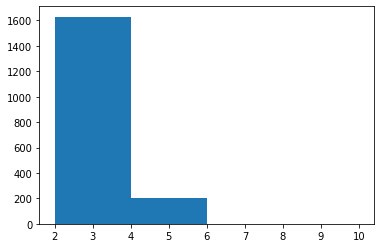

In [ ]:
#linear regression histogram
fig, ax = plt.subplots()
ax.hist(bootstrap3, bins = [2, 4, 6, 8, 10])
 
#plot
plt.show()

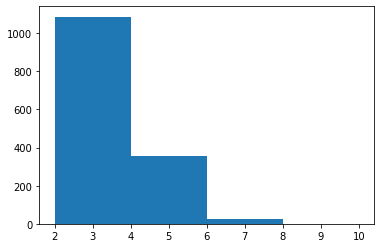

In [ ]:
#non linear regression histogram
fig, ax = plt.subplots()
ax.hist(bootstrap4, bins = [2, 4, 6, 8, 10])
    
#plot
plt.show()

7. Improve model

In [ ]:
df2.describe()

,timespent,treatment,age,channels
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,227.751513,0.500000,20.585833,4.860833
std,53.153451,0.500208,5.554729,3.260418
min,107.950215,0.000000,13.000000,0.000000
25%,182.496889,0.000000,16.000000,2.000000
50%,229.672659,0.500000,20.000000,5.000000
75%,270.643429,1.000000,25.250000,8.000000
max,337.236607,1.000000,30.000000,10.000000


In [ ]:
df2.channels.value_counts()

0     134
1     128
4     121
9     113
8     112
10    108
3     101
6     100
7      96
2      94
5      93
Name: channels, dtype: int64

In [ ]:
df2.age.value_counts()

13    178
29     71
18     69
19     68
17     68
20     67
14     64
25     62
26     62
30     60
16     60
21     59
27     56
24     56
15     53
23     52
28     51
22     44
Name: age, dtype: int64

In [ ]:
df2.groupby(['age']).mean()

,timespent,treatment,channels
age,,,
13,303.543447,0.528090,4.870787
14,285.538691,0.500000,4.625000
15,275.380840,0.547170,5.132075
16,267.489568,0.500000,4.883333
17,258.846053,0.500000,5.058824
18,248.958365,0.463768,4.971014
19,239.743593,0.544118,4.367647
20,231.893416,0.388060,4.761194
21,221.710135,0.542373,4.254237


In [ ]:
df2.groupby(['channels']).mean()

,timespent,treatment,age
channels,,,
0,228.102272,0.485075,20.104478
1,227.448563,0.484375,20.250000
2,224.261405,0.531915,20.595745
3,224.879004,0.554455,20.742574
4,224.857454,0.487603,20.652893
5,220.339065,0.494624,21.354839
6,222.899537,0.500000,21.200000
7,228.588485,0.489583,20.833333
8,239.428776,0.580357,19.723214


In [ ]:
# Get point estimate
point_estimate7 = regression('timespent ~ treatment + channels + age + (age*channels)', df2)
print("Estimated effect of treatment is: " + str(round(point_estimate7, 3)))

Estimated effect of treatment is: 3.059


In [ ]:
bootstrap7 = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 600 treated and 600 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate7 = regression('timespent ~ treatment + channels + age + (age*channels)', df2.iloc[sample,])
  bootstrap7.append(estimate7)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(estimate7, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap7), 4)))
print("The t-statistic is: " + str(round(point_estimate7/np.std(bootstrap7), 4)))

Estimated effect of treatment is: 3.053
The standard error of the estimate: 0.7318
The t-statistic is: 4.1795
